**1. 준비 (GPU T4로 세팅)**

In [1]:
!nvidia-smi -L || echo "No GPU detected (ok for quick tests)"
!pip -q install "transformers" "datasets==3.0.1" "torch==2.3.0+cu118" "torchvision==0.18.0+cu118" "torchaudio==2.3.0+cu118" "sentencepiece" \
                 "pandas" "numpy" "matplotlib" "tqdm" "evaluate" -f https://download.pytorch.org/whl/torch_stable.html

GPU 0: Tesla T4 (UUID: GPU-6ae2d1f0-5697-0282-ad52-77085605b9f7)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.6/839.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB

**2. Github Link 추가하여 데이터 불러오기, 데이터 파일 명만 추가하여 파일 구분**

In [2]:
import pandas as pd

# GitHub raw URL 목록
urls = [
    "https://raw.githubusercontent.com/ellastra/SocialData_SportsCommunity/refs/heads/main/LCK_data/comments_with_events_1.csv",
    "https://raw.githubusercontent.com/ellastra/SocialData_SportsCommunity/refs/heads/main/LCK_data/comments_with_events_2.csv",
    "https://raw.githubusercontent.com/ellastra/SocialData_SportsCommunity/refs/heads/main/LCK_data/comments_with_events_3.csv"
]

dfs = []

for url in urls:
    # 파일 이름만 추출 (예: Round1_Bahrain.csv → Round1_Bahrain)
    filename = url.split("/")[-1].replace(".csv", "")

    # CSV 읽기
    df = pd.read_csv(url)

    dfs.append(df)

# 모든 데이터 합치기
df_all = pd.concat(dfs, ignore_index=True)

In [3]:
df_all.head()

,time,timestamp,author,message,format,date,datetime_kst,comment_sec,date_key,drake_normal_event,...,herald_event,nashor_event,drake_elder_event,kill_event,takedown_event,nexus_event,kill_streak_event,solokill_event,upset_event,upset_gameend_event
0,-1:54:31,1749014450918319,UCpTHr9Rn5_w9BEMheofv82w,KT 파이팅!!!,R1~2,2025-06-04,2025-06-04 14:20:50+09:00,6871,2025-06-04,0,...,0,0,0,0,0,0,0,0,0,0
1,-1:42:23,1749015179089550,UCuSabTEvRG-f7w6Pa80RyLg,쇼메이커는 무조건 1찍이다,R1~2,2025-06-04,2025-06-04 14:32:59+09:00,6143,2025-06-04,0,...,0,0,0,0,0,0,0,0,0,0
2,-1:32:52,1749015750551203,UCNInwRrJCCrVFBz-kkxVqfA,블루가어디임?,R1~2,2025-06-04,2025-06-04 14:42:30+09:00,5572,2025-06-04,0,...,0,0,0,0,0,0,0,0,0,0
3,-1:25:43,1749016179287640,UCC4cqWCL8LGCsQLmB8afheA,T,R1~2,2025-06-04,2025-06-04 14:49:39+09:00,5143,2025-06-04,0,...,0,0,0,0,0,0,0,0,0,0
4,-1:25:25,1749016197284369,UC13UxJwYop0g_YWB-wA08Uw,ㄷㄱㄷㄱ 아무나 이겨랑,R1~2,2025-06-04,2025-06-04 14:49:57+09:00,5125,2025-06-04,0,...,0,0,0,0,0,0,0,0,0,0


**3. 데이터 컬럼 선택 및 클리닝**

클리닝
- 디시인사이드의 경우 "dc official App" 삭제
- 해시태그, 멘션, URL, 공백 삭제
- "ㅋㅋㅋ"나 "!!!" 등의 표현 수는 남겨두기

**추후논의하여 클리닝 수정 가능

In [4]:
# 마이크로초 단위 timestamp를 datetime 객체로 변환
# unit='us'를 사용하여 마이크로초 단위임을 지정합니다.
df_all['datetime_utc'] = pd.to_datetime(df_all['timestamp'], unit='us', errors='coerce')

# 초 이하 단위 제거
df_all['datetime_utc'] = df_all['datetime_utc'].dt.floor('s')

# UTC 시간을 KST (UTC+9)로 변환
# 먼저 UTC 타임존 정보를 추가하고, 그 다음 KST로 변환합니다.
df_all['datetime_kst'] = df_all['datetime_utc'].dt.tz_localize('UTC').dt.tz_convert('Asia/Seoul')

# 초 이하 단위 제거
df_all['datetime_kst'] = df_all['datetime_kst'].dt.floor('s')

In [5]:
#결과 확인
df_all.head()

,time,timestamp,author,message,format,date,datetime_kst,comment_sec,date_key,drake_normal_event,...,nashor_event,drake_elder_event,kill_event,takedown_event,nexus_event,kill_streak_event,solokill_event,upset_event,upset_gameend_event,datetime_utc
0,-1:54:31,1749014450918319,UCpTHr9Rn5_w9BEMheofv82w,KT 파이팅!!!,R1~2,2025-06-04,2025-06-04 14:20:50+09:00,6871,2025-06-04,0,...,0,0,0,0,0,0,0,0,0,2025-06-04 05:20:50
1,-1:42:23,1749015179089550,UCuSabTEvRG-f7w6Pa80RyLg,쇼메이커는 무조건 1찍이다,R1~2,2025-06-04,2025-06-04 14:32:59+09:00,6143,2025-06-04,0,...,0,0,0,0,0,0,0,0,0,2025-06-04 05:32:59
2,-1:32:52,1749015750551203,UCNInwRrJCCrVFBz-kkxVqfA,블루가어디임?,R1~2,2025-06-04,2025-06-04 14:42:30+09:00,5572,2025-06-04,0,...,0,0,0,0,0,0,0,0,0,2025-06-04 05:42:30
3,-1:25:43,1749016179287640,UCC4cqWCL8LGCsQLmB8afheA,T,R1~2,2025-06-04,2025-06-04 14:49:39+09:00,5143,2025-06-04,0,...,0,0,0,0,0,0,0,0,0,2025-06-04 05:49:39
4,-1:25:25,1749016197284369,UC13UxJwYop0g_YWB-wA08Uw,ㄷㄱㄷㄱ 아무나 이겨랑,R1~2,2025-06-04,2025-06-04 14:49:57+09:00,5125,2025-06-04,0,...,0,0,0,0,0,0,0,0,0,2025-06-04 05:49:57


In [6]:
!pip install soynlp emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 35.2 MB/s eta 0:00:00


In [7]:
import re
import emoji
from soynlp.normalizer import repeat_normalize

pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣]+')
url_pattern = re.compile(
    r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

def clean(x):
    x = pattern.sub(' ', x)
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)
    return x

In [8]:
import pandas as pd
import numpy as np
import re

# ---------------------------------------------------------------------
# 데이터 클리닝

def normalize_text(s: str) -> str:
    if not isinstance(s, str):
        return ""

    # 1) URL 제거
    s = re.sub(r"http\S+|www\.\S+", " ", s)

    # 2) 멘션/해시태그 제거
    s = re.sub(r"[@#]\w+", " ", s)

    # 3) 반복 문자 축약 (ㅋㅋㅋㅋ -> ㅋㅋ, 아아아아 -> 아아, !!!!! -> !!)
    s = re.sub(r"([ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9!?.])\1{2,}", r"\1\1", s)

    #4) 이모지/특수문자 과도한 것 정리 (한글/영문/숫자/기본문장부호만 유지)
    s = re.sub(r"[^\w\s가-힣ㄱ-ㅎㅏ-ㅣ!?.]", " ", s, flags=re.UNICODE)

    # 6) 공백 정리
    s = re.sub(r"\s+", " ", s).strip()

    s = clean(s)

    return s



####클리닝은 논의 후 추가

# ---------------------------------------------------------------------
print("Before cleaning, rows:", len(df_all))
# 데이터프레임 컬럼 선택 (df_all에서 필요한 컬럼 선택)
df = df_all[['date','time', 'datetime_kst','timestamp', 'author', 'message', 'format',
        'comment_sec', 'drake_normal_event', 'voidgrub_event', 'herald_event', 'nashor_event', 'drake_elder_event',
       'kill_event', 'takedown_event', 'nexus_event', 'kill_streak_event',
       'solokill_event', 'upset_event', 'upset_gameend_event']].copy()

# 채팅 제한 봇 데이터 삭제 (유저id: UCSvjQBDgYDB5TGVmCZObcwA)
df = df[df['author'] != 'UCSvjQBDgYDB5TGVmCZObcwA'].copy()

# 클리닝
df["clean_text"] = df["message"].map(normalize_text)


# 빈 텍스트/공백만 남은 행 제거
df["clean_text"] = df["clean_text"].fillna("").str.strip()
df = df[df["clean_text"].astype(bool)].reset_index(drop=True)

print("After cleaning, rows:", len(df))

#원본 message 열 삭제
df = df.drop(columns=["message"])

Before cleaning, rows: 1520294
After cleaning, rows: 1503848


In [9]:
#데이터 확인
df.sample(5)

,date,time,datetime_kst,timestamp,author,format,comment_sec,drake_normal_event,voidgrub_event,herald_event,nashor_event,drake_elder_event,kill_event,takedown_event,nexus_event,kill_streak_event,solokill_event,upset_event,upset_gameend_event,clean_text
755277,2025-06-13,2:56:09,2025-06-13 19:06:30+09:00,1749809190048017,UC3xi2SgQd4xXCFsKZVz0WFA,RTM,10569,0,0,0,0,0,0,0,0,0,0,0,0,듀로 역시 거품이였네..
1228476,2025-09-05,1:01:14,2025-09-05 17:21:35+09:00,1757060495239901,UCIf3lr9qn1XDihbHfdFwIrA,PLAY-IN,3674,0,0,0,0,0,0,0,0,0,0,0,0,레전드는 레전드네
1372093,2025-09-14,1:08:08,2025-09-14 15:38:24+09:00,1757831904383430,UCULQztFc9EURbOhpSDKo_3Q,PLAYOFF,4088,0,0,0,0,0,1,0,0,0,0,0,0,케리아랑 페이커만 잘하면 되겠는데 내년에는 이 두명 좀 자르면 안되냐
1030060,2025-08-07,51:06,2025-08-07 17:21:27+09:00,1754554887339490,UCJrt3zxzGZ530sokDaktO5g,R3~5,3066,0,0,0,0,0,0,0,0,0,0,0,0,농심 용서 못해
1079794,2025-08-03,4:05:09,2025-08-03 18:36:29+09:00,1754213789562962,UCfW6j94eX1pO3Rjhkt5fuvw,R3~5,14709,0,0,0,0,0,1,0,0,0,0,0,0,쵸비랑 하는 라인전이 힘들어보이네


**4. 파인튜닝을 위한 데이터셋 불러오기**

사용데이터: KOTE
- KOTE: Korean Online That-gul Emotions Dataset https://github.com/searle-j/KOTE

In [10]:
from datasets import load_dataset

dataset = load_dataset("searle-j/kote", trust_remote_code=True)
print(dataset)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


kote.py: 0.00B [00:00, ?B/s]

README.md:   0%|          | 0.00/326 [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['ID', 'text', 'labels'],
        num_rows: 40000
    })
    test: Dataset({
        features: ['ID', 'text', 'labels'],
        num_rows: 5000
    })
    validation: Dataset({
        features: ['ID', 'text', 'labels'],
        num_rows: 5000
    })
})


### Finetune

In [ ]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from sklearn.metrics import accuracy_score, f1_score

# 1. KOTE 44개 레이블 정의
kote_labels = [
    '불평/불만', '환영/호의', '감동/감탄', '지긋지긋', '고마움', '슬픔', '화남/분노', '존경', '기대감', '우쭐댐/무시함',
    '안타까움/실망', '비장함', '의심/불신', '뿌듯함', '편안/쾌적', '신기함/관심', '아껴주는', '부끄러움', '공포/무서움', '절망',
    '한심함', '역겨움/징그러움', '짜증', '어이없음', '없음', '패배/자기혐오', '귀찮음', '힘듦/지침', '즐거움/신남', '깨달음',
    '죄책감', '증오/혐오', '흐뭇함(귀여움/예쁨)', '당황/난처', '경악', '부담/안_내킴', '서러움', '재미없음', '불쌍함/연민', '놀람',
    '행복', '불안/걱정', '기쁨', '안심/신뢰'
]

label2id = {label: i for i, label in enumerate(kote_labels)}
id2label = {i: label for i, label in enumerate(kote_labels)}

# 2. 데이터셋 로드
dataset = load_dataset("searle-j/kote")

# =================================================================
# [수정됨] 전처리: 기존 labels 컬럼과 충돌하지 않도록 새 컬럼 생성 후 교체
# =================================================================
def preprocess_multilabel(example):
    # 1. 길이 44의 0.0 벡터 생성
    labels_vec = [0.0] * len(kote_labels)
    # 2. 해당되는 인덱스를 1.0으로 설정
    for idx in example['labels']:
        labels_vec[idx] = 1.0

    # 3. 'new_labels'라는 새로운 키에 저장 (기존 labels와 타입 충돌 방지)
    return {'new_labels': np.array(labels_vec, dtype=np.float32)}

# 1) 새로운 라벨 컬럼(new_labels) 생성
dataset = dataset.map(preprocess_multilabel)

# 2) 기존 정수형 'labels' 컬럼 삭제
dataset = dataset.remove_columns(['labels'])

# 3) 'new_labels'를 'labels'로 이름 변경 (이제 labels는 확실하게 float입니다)
dataset = dataset.rename_column('new_labels', 'labels')


# 3. 토크나이저 및 토큰화
model_name = "beomi/KcELECTRA-base-v2022"
tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=64)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# 학습에 불필요한 ID 컬럼 제거
tokenized_datasets = tokenized_datasets.remove_columns(['ID'])
tokenized_datasets.set_format("torch")

# [확인] 이제 torch.float32가 출력되어야 합니다.
print(f"Labels dtype: {tokenized_datasets['train'][0]['labels'].dtype}")
# 4. 모델 로드 (safetensors 옵션 포함)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(kote_labels),
    problem_type="multi_label_classification",
    id2label=id2label,
    label2id=label2id,
    use_safetensors=True
)

# 5. 평가 함수 정의
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    probs = 1 / (1 + np.exp(-logits))
    predictions = (probs > 0.5).astype(int)

    # 지표 계산
    f1 = f1_score(labels, predictions, average='micro')
    acc = accuracy_score(labels, predictions)
    return {"f1_micro": f1, "accuracy": acc}

# 6. 학습 설정 (wandb 끄기 포함)
training_args = TrainingArguments(
    output_dir="./kcelectra-kote-multilabel",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to="none",      # wandb 비활성화
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=1,
    fp16=True,
    load_best_model_at_end=True,
    metric_for_best_model="f1_micro"
)

# 7. 트레이너 및 학습 시작
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

print("학습 시작...")
trainer.train()

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Labels dtype: torch.float32


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base-v2022 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-775656348.py:99: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


학습 시작...


Epoch,Training Loss,Validation Loss,F1 Micro,Accuracy
1,0.328700,0.307930,0.564264,0.006200
2,0.291500,0.291805,0.596891,0.015000
3,0.277400,0.288398,0.612904,0.015800


TrainOutput(global_step=3750, training_loss=0.3090550984700521, metrics={'train_runtime': 696.3502, 'train_samples_per_second': 172.327, 'train_steps_per_second': 5.385, 'total_flos': 3948154122240000.0, 'train_loss': 0.3090550984700521, 'epoch': 3.0})

In [ ]:
from google.colab import drive
import os

# 1. Google Drive 마운트 (팝업창에서 권한 허용 필요)
drive.mount('/content/drive')

# 2. 저장 경로 설정 (내 드라이브 내의 폴더)
# 원하는 경로로 수정하셔도 됩니다.
save_path = "/content/drive/MyDrive/Sports Community/kcelectra_kote_model"

# 3. 모델과 토크나이저 저장
# trainer.save_model은 모델 가중치, 설정(config), 토크나이저를 모두 저장합니다.
print(f"모델을 {save_path}에 저장 중입니다...")

trainer.save_model(save_path)
tokenizer.save_pretrained(save_path)

print(f"저장 완료! 구글 드라이브 경로를 확인해보세요: {save_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
모델을 /content/drive/MyDrive/Sports Community/kcelectra_kote_model에 저장 중입니다...
저장 완료! 구글 드라이브 경로를 확인해보세요: /content/drive/MyDrive/Sports Community/kcelectra_kote_model


## 분석

In [13]:
from google.colab import drive
from transformers import AutoTokenizer, ElectraForSequenceClassification

drive.mount('/content/drive')
load_path = "/content/drive/MyDrive/Sports Community/kcelectra_kote_model"

# kote_labels, id2label, label2id를 다시 정의합니다. (이전 셀에서 정의되었지만, 이 셀의 스코프 내에서 필요합니다)
kote_labels = [
    '불평/불만', '환영/호의', '감동/감탄', '지긋지긋', '고마움', '슬픔', '화남/분노', '존경', '기대감', '우쭐댐/무시함',
    '안타까움/실망', '비장함', '의심/불신', '뿌듯함', '편안/쾌적', '신기함/관심', '아껴주는', '부끄러움', '공포/무서움', '절망',
    '한심함', '역겨움/징그러움', '짜증', '어이없음', '없음', '패배/자기혐오', '귀찮음', '힘듦/지침', '즐거움/신남', '깨달음',
    '죄책감', '증오/혐오', '흐뭇함(귀여움/예쁨)', '당황/난처', '경악', '부담/안_내킴', '서러움', '재미없음', '불쌍함/연민', '놀람',
    '행복', '불안/걱정', '기쁨', '안심/신뢰'
]
label2id = {label: i for i, label in enumerate(kote_labels)}
id2label = {i: label for i, label in enumerate(kote_labels)}

# 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained(load_path)

# 모델 로드 (AutoModel 대신 ElectraForSequenceClassification 사용)
model = ElectraForSequenceClassification.from_pretrained(
    load_path,
    problem_type="multi_label_classification",
    use_safetensors=True
)

print("모델 로드 완료!")

Mounted at /content/drive
모델 로드 완료!


In [14]:
import torch
import numpy as np
from tqdm.auto import tqdm

# =================================================================
# 1. 설정: 배제 라벨 & 매핑 룰 (기존과 동일)
# =================================================================
exclude_labels = {
    '비장함', '의심/불신', '신기함/관심'
}

final_label_mapping = {
    # Anger
    '불평/불만': 'Anger', '지긋지긋': 'Anger', '화남/분노': 'Anger', '짜증': 'Anger','어이없음': 'Anger',
    # Disgust
    '역겨움/징그러움': 'Disgust', '증오/혐오': 'Disgust', '한심함': 'Disgust', '귀찮음': 'Disgust', '재미없음': 'Disgust', '우쭐댐/무시함': 'Anger',
    # Fear
    '공포/무서움': 'Fear', '불안/걱정': 'Fear', '부담/안_내킴': 'Fear',
    # Happiness
    '환영/호의': 'Happiness', '감동/감탄': 'Happiness', '고마움': 'Happiness',
    '뿌듯함': 'Happiness', '편안/쾌적': 'Happiness', '아껴주는': 'Happiness', '즐거움/신남': 'Happiness',
    '흐뭇함(귀여움/예쁨)': 'Happiness', '행복': 'Happiness', '기쁨': 'Happiness', '안심/신뢰': 'Happiness',
    # Sadness
    '슬픔': 'Sadness', '안타까움/실망': 'Sadness', '절망': 'Sadness', '패배/자기혐오': 'Sadness',
    '힘듦/지침': 'Sadness', '죄책감': 'Sadness', '서러움': 'Sadness', '불쌍함/연민': 'Sadness', '부끄러움': 'Sadness',
    # Surprise
    '놀람': 'Surprise', '경악': 'Surprise', '당황/난처': 'Surprise',
    # Neutral / Others
    '없음': 'Neutral', '존경': 'Neutral', '기대감': 'Neutral', '깨달음': 'Neutral'
}

# 배제할 라벨들의 ID(인덱스)를 미리 찾아둡니다.
exclude_indices = [label2id[label] for label in exclude_labels if label in label2id]

# =================================================================
# 2. 마스킹을 적용한 효율적인 추론 함수
# =================================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

def predict_with_masking(texts, threshold=0.5, batch_size=128):
    final_emotions = []
    final_scores = []

    for i in tqdm(range(0, len(texts), batch_size), desc="Analyzing with Masking"):
        batch_texts = texts[i : i+batch_size]

        # 토큰화
        inputs = tokenizer(batch_texts, padding=True, truncation=True, max_length=64, return_tensors="pt").to(device)

        with torch.no_grad():
            outputs = model(**inputs)

        # 확률 계산
        probs = torch.sigmoid(outputs.logits)

        # [핵심] 배제할 라벨들의 확률을 0으로 만들어버림 (Masking)
        # 텐서 연산으로 한 번에 처리하므로 매우 빠릅니다.
        probs[:, exclude_indices] = 0.0

        # 이제 남은 것들 중에서 1등 찾기
        max_probs, max_indices = torch.max(probs, dim=-1)

        max_probs = max_probs.cpu().numpy()
        max_indices = max_indices.cpu().numpy()

        for prob, idx in zip(max_probs, max_indices):
            original_label = id2label[idx]

            # 1. 마스킹 후에도 1등 점수가 너무 낮으면 -> Neutral
            # (즉, 원래 감정이 '깨달음' 90%, '기쁨' 10% 였다면,
            #  깨달음이 0점이 되고 기쁨이 1등이 되지만 점수가 10%라 탈락)
            if prob < threshold:
                final_emotions.append("Neutral")

            # 2. 유효한 감정이면 매핑
            elif original_label in final_label_mapping:
                final_emotions.append(final_label_mapping[original_label])

            # 3. 그 외 (매핑표에 없는 경우)
            else:
                final_emotions.append("Neutral")

            final_scores.append(prob)

    return final_emotions, final_scores

# =================================================================
# 3. 실행 및 결과 저장
# =================================================================
target_texts = df['clean_text'].tolist()

# 마스킹 방식 실행
# 배제된 감정이 사라지므로, 남은 감정들의 점수가 상대적으로 낮을 수 있습니다.
# 따라서 threshold를 상황에 맞춰 조절해야 하지만, 일단 0.5로 시도합니다.
emotions_masked, scores_masked = predict_with_masking(target_texts, threshold=0.5)

df['masked_emotion'] = emotions_masked
df['masked_score'] = scores_masked

# 결과 확인
print("\n=== 감정 분포 (마스킹 적용) ===")
print(df['masked_emotion'].value_counts())

# =================================================================
# 4. Top 3 댓글 확인
# =================================================================
target_categories = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise']

print("\n" + "="*80)
print("🧐 6대 감정별 Top 3 댓글 (마스킹 방식)")
print("="*80)

for emotion in target_categories:
    subset = df[df['masked_emotion'] == emotion].sort_values(by='masked_score', ascending=False).head(3)

    print(f"\n[ {emotion} ]")
    if subset.empty:
        print("  - 데이터 없음")
    else:
        for idx, row in subset.iterrows():
            print(f"  Score {row['masked_score']:.4f} | {row['clean_text']}")

Analyzing with Masking:   0%|          | 0/11749 [00:00<?, ?it/s]


=== 감정 분포 (마스킹 적용) ===
masked_emotion
Happiness    417930
Anger        386608
Neutral      376527
Surprise     179362
Sadness      110965
Disgust       25196
Fear           7260
Name: count, dtype: int64

🧐 6대 감정별 Top 3 댓글 (마스킹 방식)

[ Anger ]
  Score 0.9907 | 유튜브 채팅창은 급식들이 너무많아서 더럽네 관리도안하는거같고 딴데가야긋다
  Score 0.9905 | 6위가 뭐 제자리야 더 내려가야지 이따위로하는데 6위씩이나하는게맞냐
  Score 0.9903 | 진짜 롤도 다 망했다. 관전자를 호구로 보고 이딴식으로 하네

[ Disgust ]
  Score 0.9604 | 역겨운 애들 많긴하네
  Score 0.9579 | 진짜 사람들 역겹긴하네 ㅋㅋ인생 알만하노
  Score 0.9551 | 스펀지의 개쓰렉 인성 덕분에 기록하나 날라갔지

[ Fear ]
  Score 0.8724 | 제발 아직 안끝났으니까 스택 쌓지 말자 젠지 무섭다
  Score 0.8692 | 어떻게 이길 방법이 없을까요??
  Score 0.8678 | 할미 고혈압..오기 직전이야 오늘은 .믿어도 되지..?

[ Happiness ]
  Score 0.9759 | 비디디 잘하는데 어떻게 표현을 해야하나. 최고다.
  Score 0.9758 | 개쩐다. 이게 티원이지. 돌아왔구나 티태식들아ㅠㅠ
  Score 0.9757 | 딜라이트는 진짜 작년부터 너무 잘한다..

[ Sadness ]
  Score 0.9609 | 버스메이커 이젠 예후만도 못하노 ㅠㅠ 역대급 미드차이 ㅠㅠ
  Score 0.9589 | 프로들은 높은 금액을 받는만큼 관객들에게 기쁨과 감동을 주는 책임감있는 행동을 보여줘야하는데 이건 아닌거 같다..ㅜ
  Score 0.9579 | dn조합이 더 좋아 사이온 픽했는데 앞

In [15]:
df.to_csv('/content/drive/MyDrive/Sports Community/LCK_KOTE_result.csv', index = False)

검증 데이터 추론 중...


Analyzing with Masking:   0%|          | 0/1 [00:00<?, ?it/s]


✅ 전체 정확도 (Accuracy): 0.6600

[상세 리포트]
              precision    recall  f1-score   support

       Anger       0.57      0.76      0.65        17
     Disgust       1.00      0.20      0.33         5
        Fear       0.00      0.00      0.00         2
   Happiness       0.71      0.71      0.71        28
     Neutral       0.64      0.62      0.63        29
     Sadness       0.75      0.50      0.60         6
    Surprise       0.69      0.85      0.76        13

    accuracy                           0.66       100
   macro avg       0.62      0.52      0.53       100
weighted avg       0.67      0.66      0.64       100



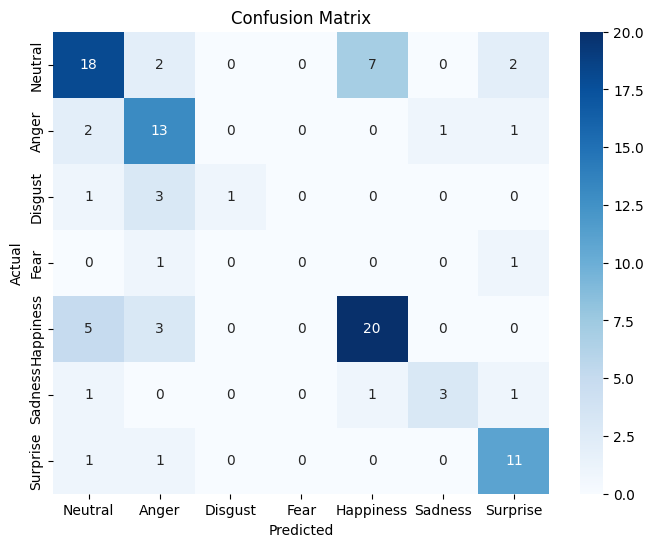


❌ 오답 데이터 샘플 (상위 5개):
- Text: 그웬 챔 저거 맞냐 ㅋㅋ
  (정답: Neutral vs 예측: Happiness)
- Text: 구마 코르키랑 다른거 보소
  (정답: Neutral vs 예측: Surprise)
- Text: 아쎄이
  (정답: Neutral vs 예측: Happiness)
- Text: 4연패 드가자 드가자
  (정답: Neutral vs 예측: Happiness)
- Text: 올프로 퍼스트는 우승을 할수없다 ㄷㄷ
  (정답: Fear vs 예측: Surprise)


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. 샘플 데이터 로드
# 파일 경로가 맞는지 확인해주세요.
sample_data_path = '/content/sample_lck_100.csv'
sample_df = pd.read_csv(sample_data_path, encoding='euc-kr') # 한글 깨짐 방지

# 2. 레이블 매핑 (숫자 -> 문자열)
# 사용자가 제공한 매핑: Neutral:0, Anger:1, Disgust:2, Fear:3, Happiness:4, Sadness:5, Surprise:6
label_map = {0: 'Neutral', 1: 'Anger', 2: 'Disgust', 3: 'Fear', 4: 'Happiness', 5: 'Sadness', 6: 'Surprise'}

# 정답 레이블(Ground Truth) 생성
sample_df['gt_emotion'] = sample_df['label'].map(label_map)

# 3. 모델 추론 실행
print("검증 데이터 추론 중...")
# clean_text 열을 리스트로 변환하여 모델에 입력
preds, scores = predict_with_masking(sample_df['clean_text'].tolist(), threshold=0.5)

sample_df['pred_emotion'] = preds
sample_df['pred_score'] = scores

# 4. 성능 평가 및 결과 출력
y_true = sample_df['gt_emotion']
y_pred = sample_df['pred_emotion']

print("\n" + "="*50)
print(f"✅ 전체 정확도 (Accuracy): {accuracy_score(y_true, y_pred):.4f}")
print("="*50)
print("\n[상세 리포트]")
print(classification_report(y_true, y_pred, zero_division=0))

# 5. 혼동 행렬(Confusion Matrix) 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred, labels=list(label_map.values()))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(label_map.values()),
            yticklabels=list(label_map.values()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# (선택) 틀린 데이터 확인
print("\n❌ 오답 데이터 샘플 (상위 5개):")
wrong_df = sample_df[sample_df['gt_emotion'] != sample_df['pred_emotion']]
for idx, row in wrong_df.head(5).iterrows():
    print(f"- Text: {row['clean_text']}")
    print(f"  (정답: {row['gt_emotion']} vs 예측: {row['pred_emotion']})")

In [ ]:
from google.colab import runtime
runtime.unassign()